In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline
plt.rcParams['figure.figsize']=10,8

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
bhp=pd.read_csv(r'F:\New all\Bengaluru_House_Data.csv')

In [4]:
bhp.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [5]:
bhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
bhp

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [7]:
#bhp['Totalsqft']=bhp.total_sqft.apply(lambda x: np.where(x.isdigit(),x,'0'))  

#Use numpy where to find non digit value, replace with '0'

In [8]:
bhp.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
#bhp.Totalsqft=bhp.Totalsqft.astype(int)

In [10]:
bhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
#bhp=bhp.drop(['total_sqft'],axis=1)

In [12]:
bhp.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
bhp=bhp.drop(['area_type','availability','society'],axis=1)

In [14]:
bhp

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [15]:
bhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [16]:
bhp.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [17]:
bhp1=bhp.dropna()
bhp1

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [18]:
bhp1.shape

(12710, 6)

In [19]:
bhp1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [20]:
bhp1['bhk'] = bhp1['size'].apply(lambda x: x.split(' ')[0])

In [21]:
bhp1=bhp1.drop(['size'],axis=1)

In [22]:
bhp1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
bhp1=bhp1.rename({'total_sqft':'totalsqft'},axis=1)

In [24]:
bhp1

,location,totalsqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715,3.0,3.0,112.00,3
13315,Whitefield,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [25]:
def conv(x):
    arr = x.split('-')
    if len(arr) == 2:
        avg = (float(arr[0]) + float(arr[1]))/2
        return avg
    try:
        return float(x)
    except:
        return None

In [26]:
bhp1['totalsqft'] = bhp1['totalsqft'].apply(lambda x: conv(x))

In [27]:
bhp1

,location,totalsqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [28]:
bhp1.location.value_counts()

Whitefield            514
Sarjapur  Road        372
Electronic City       300
Kanakpura Road        261
Thanisandra           231
                     ... 
Milk Colony             1
Sundara Nagar           1
Jaladarsini Layout      1
Madanayakahalli         1
Abshot Layout           1
Name: location, Length: 1265, dtype: int64

In [29]:
bhp1.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [30]:
bhp1['pricepersqft']=(bhp1.price*100000)/bhp1.totalsqft

In [31]:
bhp1

,location,totalsqft,bath,balcony,price,bhk,pricepersqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [32]:
bhp1.pricepersqft.describe()

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: pricepersqft, dtype: float64

In [33]:
lowerlimit,upperlimit=bhp1.pricepersqft.quantile([0.001,0.999])
lowerlimit,upperlimit

(1387.8909090909092, 45205.142857144805)

In [34]:
#remove outlier by using quantile
outliers = bhp1[(bhp1.pricepersqft>upperlimit) | (bhp1.pricepersqft<lowerlimit)]
outliers

,location,totalsqft,bath,balcony,price,bhk,pricepersqft
349,Suragajakkanahalli,11.0,3.0,2.0,74.0,3,6.727273e+05
674,Yelahanka,35000.0,3.0,3.0,130.0,3,3.714286e+02
810,4 Bedroom Farm House in Bagalur,10961.0,4.0,1.0,80.0,4,7.298604e+02
1020,Weavers Colony,15.0,1.0,0.0,30.0,1,2.000000e+05
1122,Grihalakshmi Layout,24.0,2.0,2.0,150.0,5,6.250000e+05
1567,Uttarahalli,400.0,5.0,1.0,200.0,5,5.000000e+04
1894,Nelamangala,52272.0,2.0,1.0,140.0,3,2.678298e+02
2421,Basavanagara,2000.0,3.0,2.0,25.0,4,1.250000e+03
3976,Chikkathoguru,1500.0,1.0,1.0,19.5,1,1.300000e+03
4972,Srirampuram,5.0,7.0,3.0,115.0,7,2.300000e+06


In [35]:

bhp2=bhp1[(bhp1.pricepersqft<upperlimit)&(bhp1.pricepersqft>lowerlimit)]
bhp2

,location,totalsqft,bath,balcony,price,bhk,pricepersqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [36]:
bhp2.pricepersqft.std()


3885.54848582324

In [37]:
bhp2.pricepersqft.mean()

6514.5538058091115

In [38]:
#remove outliers by using 4 standard deviation
maxlimit=bhp2.pricepersqft.mean()+4*bhp2.pricepersqft.std()
minlimit=bhp2.pricepersqft.mean()-4*bhp2.pricepersqft.std()
maxlimit,minlimit

(22056.74774910207, -9027.640137483848)

In [39]:
outliers2=bhp2[(bhp2.pricepersqft>maxlimit)|(bhp2.pricepersqft<minlimit)]
outliers2

,location,totalsqft,bath,balcony,price,bhk,pricepersqft
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268
480,RMV 2nd Stage,1150.0,4.0,2.0,260.0,4,22608.695652
743,Cunningham Road,5270.0,4.0,3.0,1250.0,4,23719.165085
770,Sector 3 HSR Layout,600.0,9.0,3.0,190.0,9,31666.666667
861,Indiranagar HAL 2nd Stage,2400.0,4.0,1.0,640.0,4,26666.666667
...,...,...,...,...,...,...,...
12918,B Channasandra,1650.0,5.0,1.0,450.0,5,27272.727273
13019,HAL 2nd Stage,2040.0,4.0,1.0,500.0,5,24509.803922
13132,1st Block Koramangala,1200.0,5.0,1.0,350.0,4,29166.666667
13200,Defence Colony,8000.0,6.0,3.0,2800.0,6,35000.000000


In [40]:

bhp3=bhp2[(bhp2.pricepersqft<maxlimit)&(bhp2.pricepersqft>minlimit) ]
bhp3

,location,totalsqft,bath,balcony,price,bhk,pricepersqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


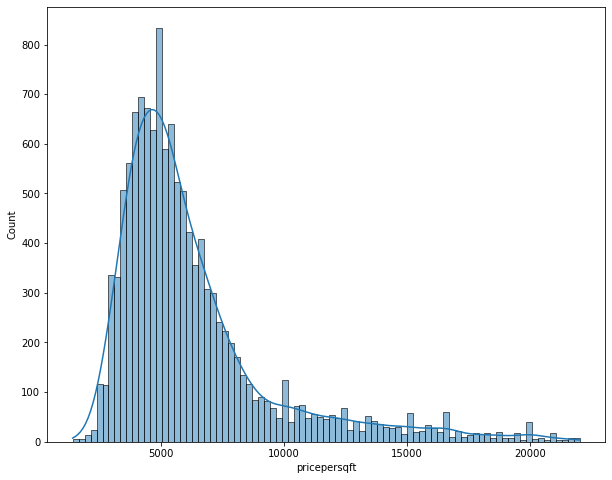

In [41]:
sns.histplot(bhp3.pricepersqft,kde=True)
plt.show()

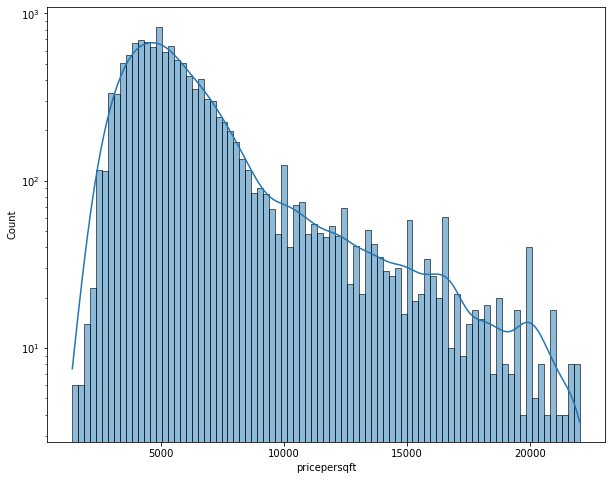

In [42]:
sns.histplot(bhp3.pricepersqft,kde=True)
plt.yscale('log')

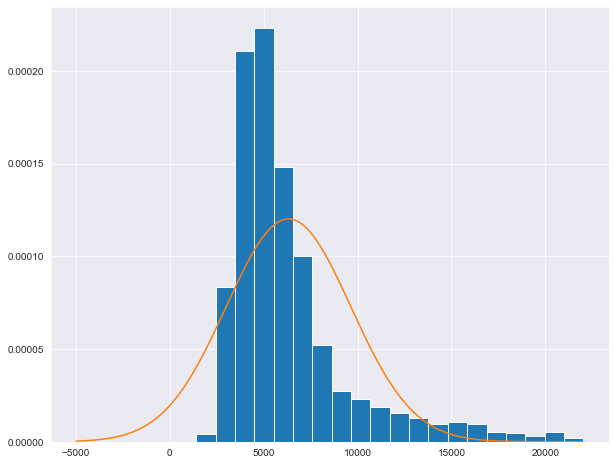

In [44]:
from scipy.stats import norm
plt.hist(bhp3.pricepersqft,bins=20,density=True)
rng = np.arange(-5000, bhp3.pricepersqft.max(), 100)
plt.plot(rng, norm.pdf(rng,bhp3.pricepersqft.mean(),bhp3.pricepersqft.std()))
plt.show()
sns.set_style('darkgrid')
